In [13]:
# imports

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from astropy import units as u
from numpy import ma
import numpy as np
from astropy.table import Table, Column, MaskedColumn, pprint
from astropy.io import fits
from astropy.wcs import WCS
from scipy import integrate
from astropy.coordinates import SkyCoord
from mpdaf.obj import Cube
import matplotlib.pyplot as plt
import numpy as np

from scipy.interpolate import interp1d
from astropy import units as u
from numpy import ma

from mpdaf.obj import Image

from mpdaf.sdetect import Source
from mpdaf.obj import Spectrum
import matplotlib.pyplot as plt
from mpdaf.obj import Cube

from ExtractandStack import *

## Extract and stack 
1) Extract each source from my filtered sample in the muse cube, produce 2d and 1d spectra for each at spatial extent 3 around layman alpha (1200-1230), then plot each.
2) Stack all the 2d spectra and 1d spectra
3) Plot 2d and 1d stack
4) Repeat 1) for damped and non damped samples
5) Repeat 2) ad 3) for non damped
6) Repeat 2) and 3) for damped

- Need to look at the sources in the sample, and if they have muse detections, decide what to include stack 
- Could find all Muse Lyman alpha emitters detected and stack them to test stacking 
- Could implement a normalisation to spectra stack / other stack could have a weighting 
- Readjust the background continuum like the journal club paper - or initially do a basic continuum extraction
- Do astrometry check


RA/Dec at center of image (input): 53.167, -27.772
RA/Dec at center of image (wcs): [ 53.16660696 -27.77240337]
Rest wavelength range: (1200, 1230)
Redshift: 6.3295
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8795.4 9015.285
Min value: -84.64190878346562
Max value: 64.16842209966853
Mean value: -2.0796316473722496
RMS: 23.23831056263359


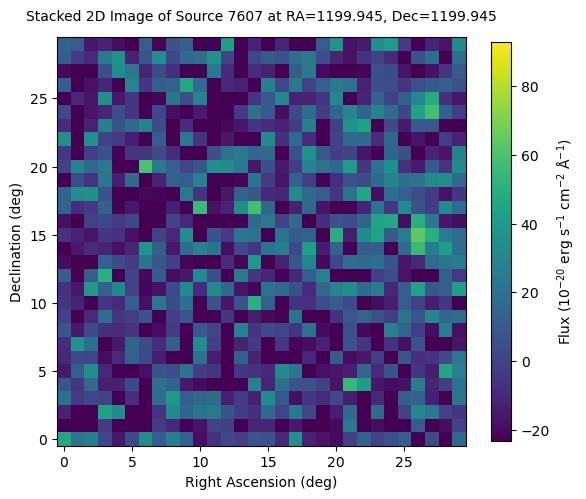

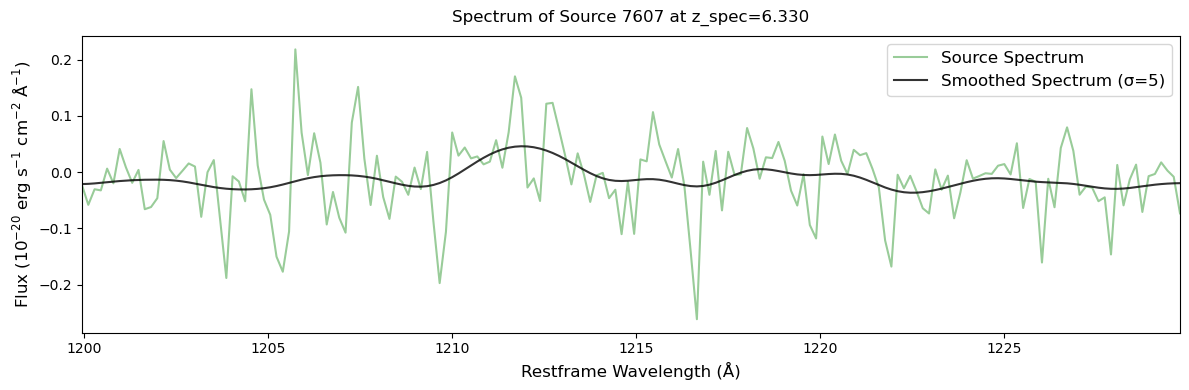

RA/Dec at center of image (input): 53.177, -27.771
RA/Dec at center of image (wcs): [ 53.17658056 -27.77115352]
Rest wavelength range: (1200, 1230)
Redshift: 5.8916
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8269.92 8476.668
Min value: -69.39620412420481
Max value: 105.72145945183001
Mean value: -0.3950173412825259
RMS: 23.158335316359352


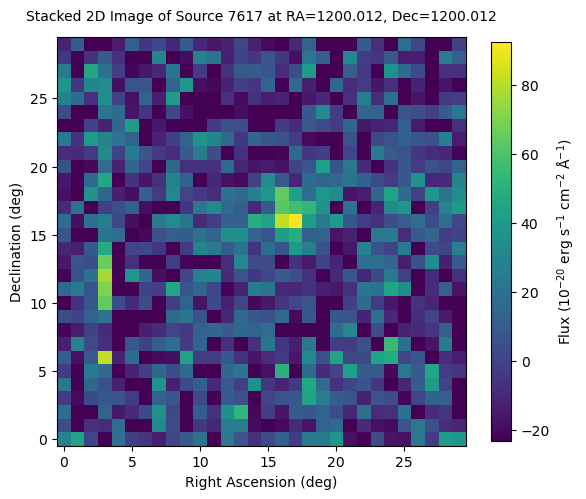

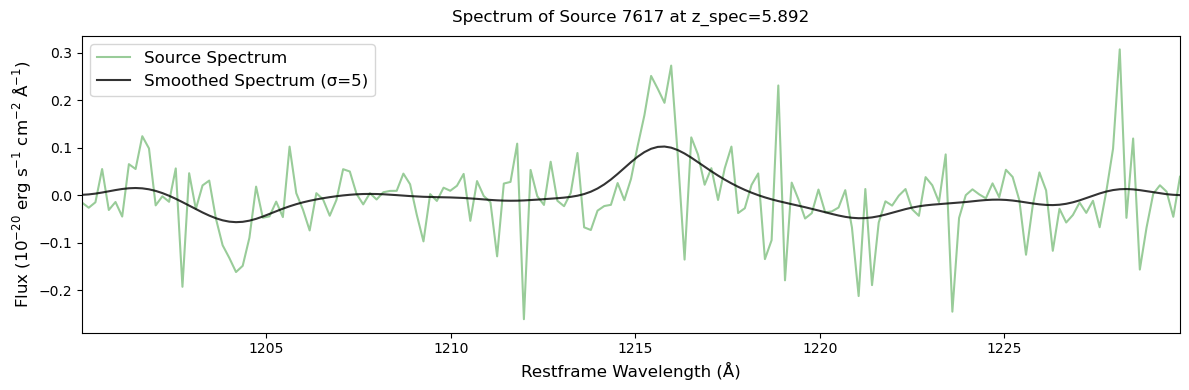

RA/Dec at center of image (input): 53.161, -27.772
RA/Dec at center of image (wcs): [ 53.16064739 -27.77161763]
Rest wavelength range: (1200, 1230)
Redshift: 5.9804
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8376.48 8585.892
Min value: -61.10460890457034
Max value: 136.18382762325928
Mean value: -0.6413622712321941
RMS: 20.00660100008086


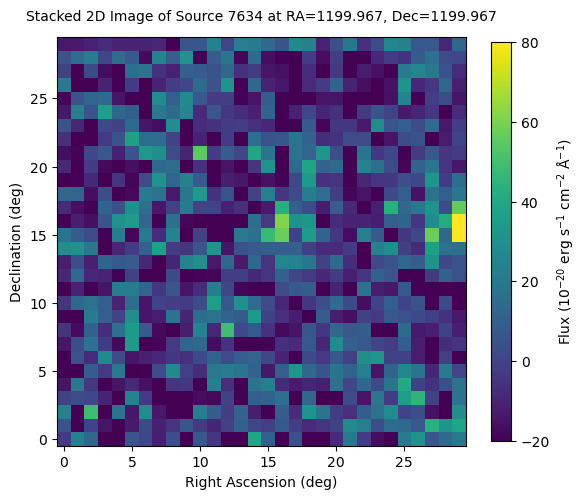

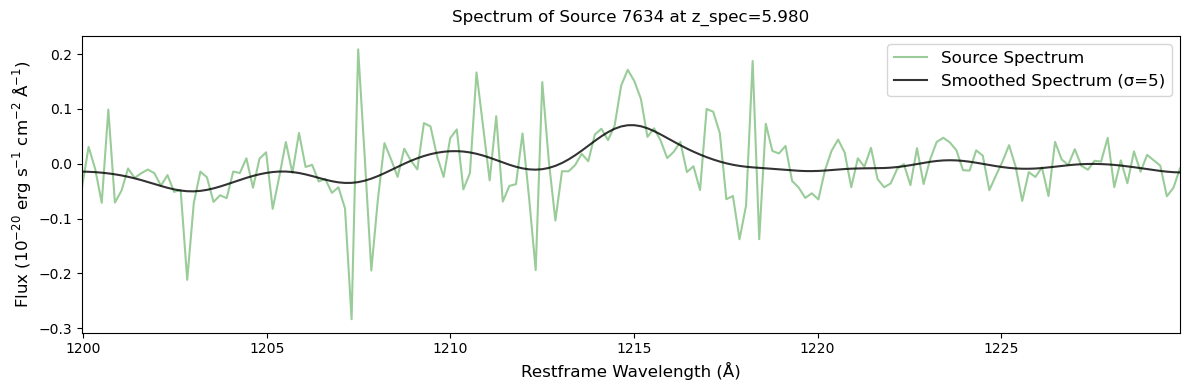

RA/Dec at center of image (input): 53.167, -27.804
RA/Dec at center of image (wcs): [ 53.16684273 -27.80413793]
Rest wavelength range: (1200, 1230)
Redshift: 5.8353
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8202.36 8407.419
Min value: -56.9068792979233
Max value: 124.18510023341514
Mean value: 6.090540137365622
RMS: 21.872639736668926


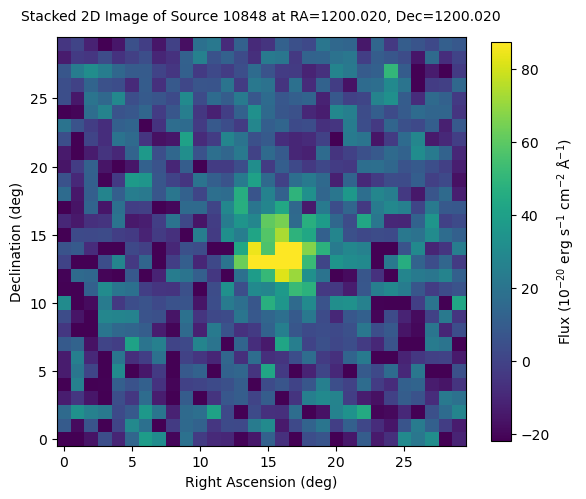

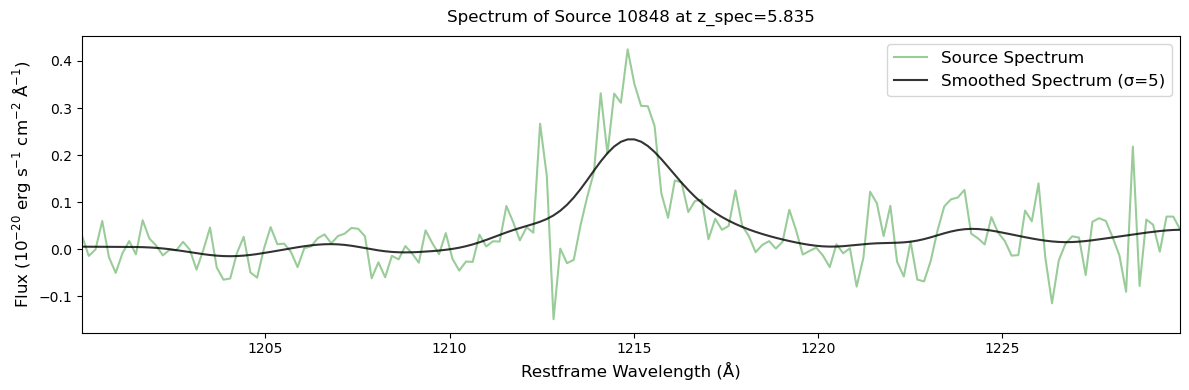

RA/Dec at center of image (input): 53.141, -27.802
RA/Dec at center of image (wcs): [ 53.14075666 -27.80219846]
Rest wavelength range: (1200, 1230)
Redshift: 5.9137
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8296.44 8503.851
Min value: -58.0440598228015
Max value: 76.3049497937318
Mean value: -0.06193269362977137
RMS: 20.78183620749394


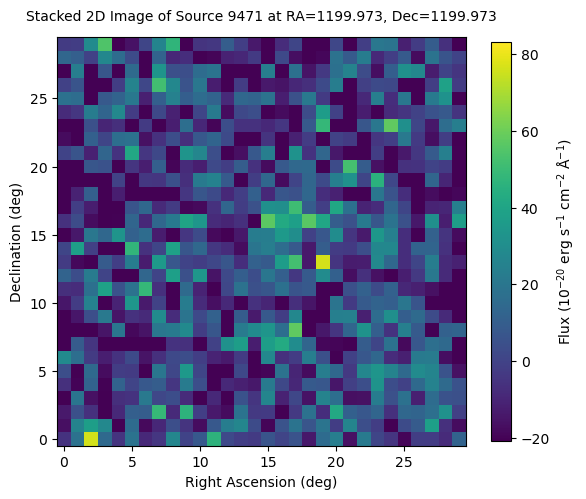

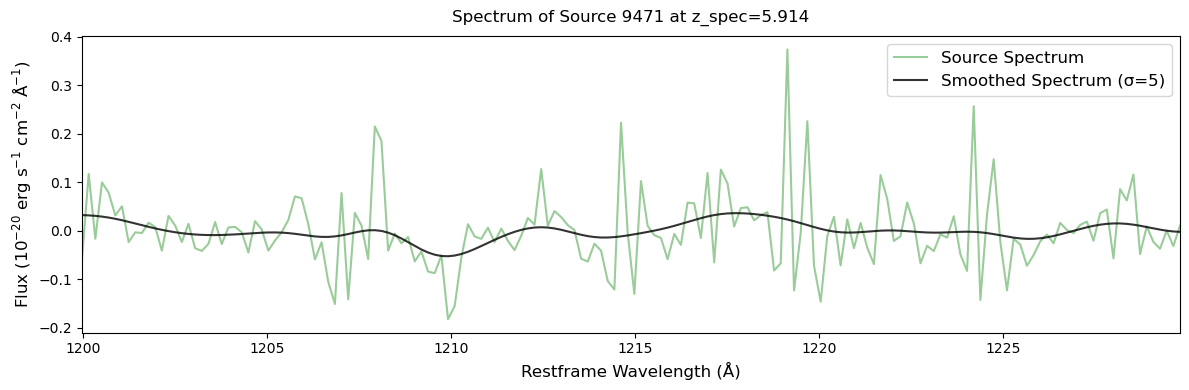

RA/Dec at center of image (input): 53.163, -27.761
RA/Dec at center of image (wcs): [ 53.16281095 -27.76085684]
Rest wavelength range: (1200, 1230)
Redshift: 5.9172
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8300.64 8508.156
Min value: -69.1524278651923
Max value: 102.55086077796295
Mean value: -0.019527081011328846
RMS: 21.74169084399815


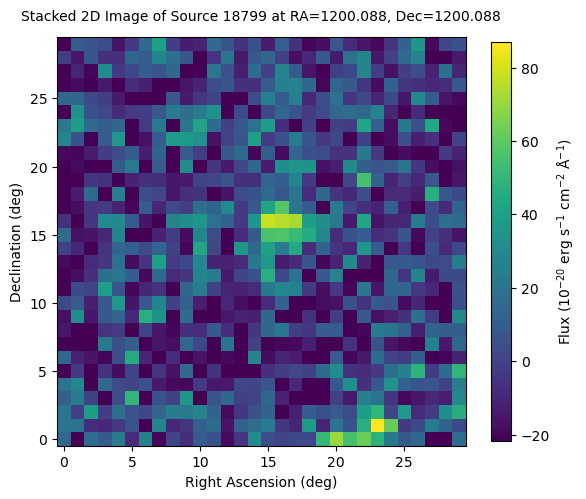

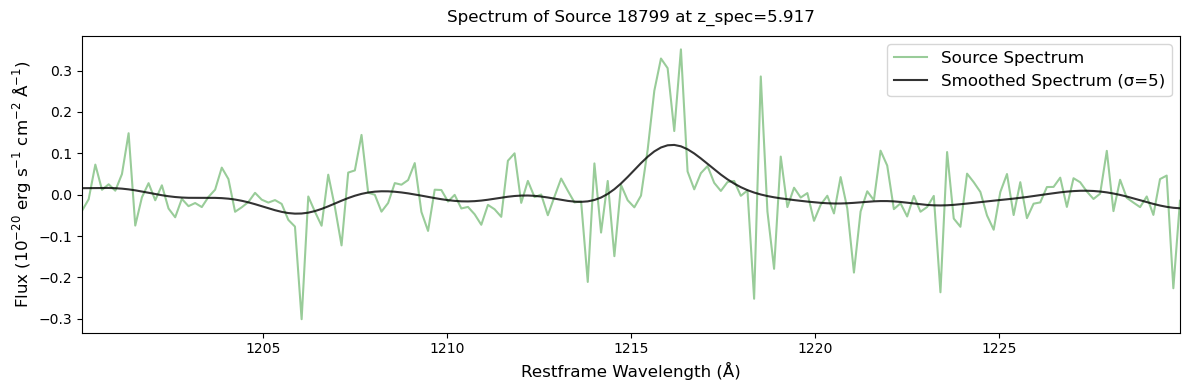

RA/Dec at center of image (input): 53.160, -27.772
RA/Dec at center of image (wcs): [ 53.15953199 -27.77155131]
Rest wavelength range: (1200, 1230)
Redshift: 6.1015
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8521.8 8734.845
Min value: -73.18325121421367
Max value: 86.74315382912755
Mean value: 2.0112771403763006
RMS: 22.205811465954522


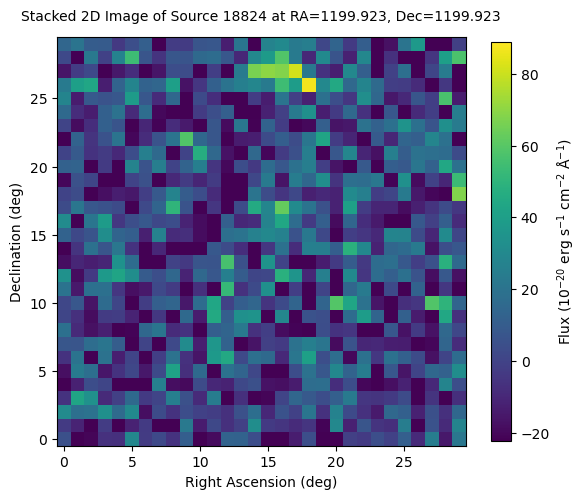

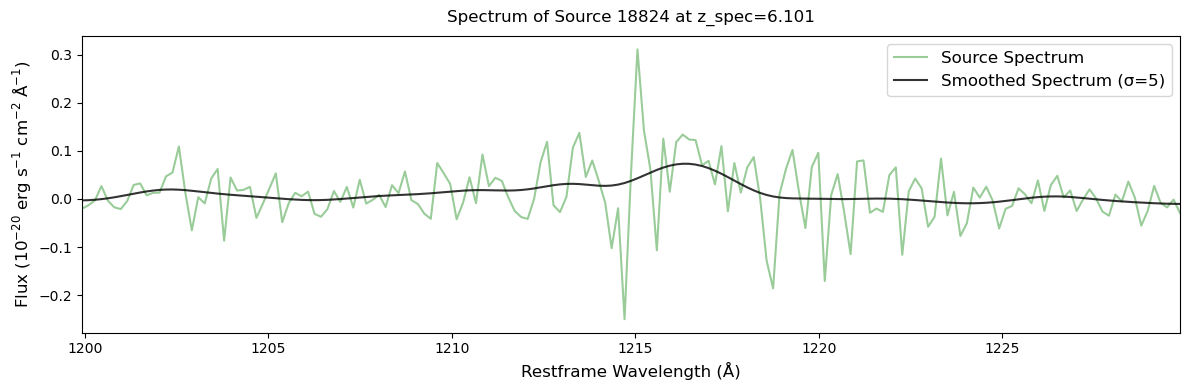

In [14]:
#1

"""
/Users/s2537809/Downloads/DJA_filtered_50_66_table.csv
/Users/s2537809/Downloads/DJA_filtered_50_66_matched_table.csv
/Users/s2537809/Downloads/DJA_filtered_50_66_blind_table.csv

+ with 56_66


"""

mosaic_file = '/Users/s2537809/Downloads/DJA_filtered_56_66_matched_table.csv'
filepath = '/Users/s2537809/MUSE/DATACUBE_UDF-MOSAIC.fits'


stacked_images, spectrum_data_dict, spectrum_wave_rest_dict = process_sources(mosaic_file, filepath, smoothing_sigma=5)



In [15]:
#2
stacked_2d_image = stack_2d_images(stacked_images)
stacked_1d_spectrum, common_wave = stack_1d_spectra(spectrum_data_dict, spectrum_wave_rest_dict)

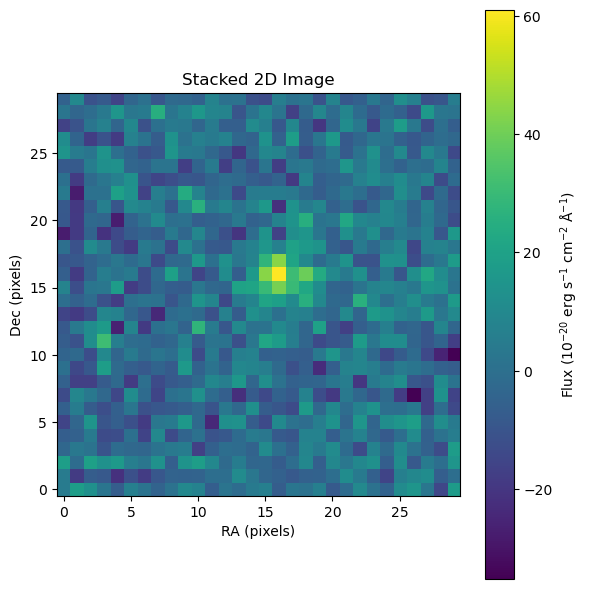

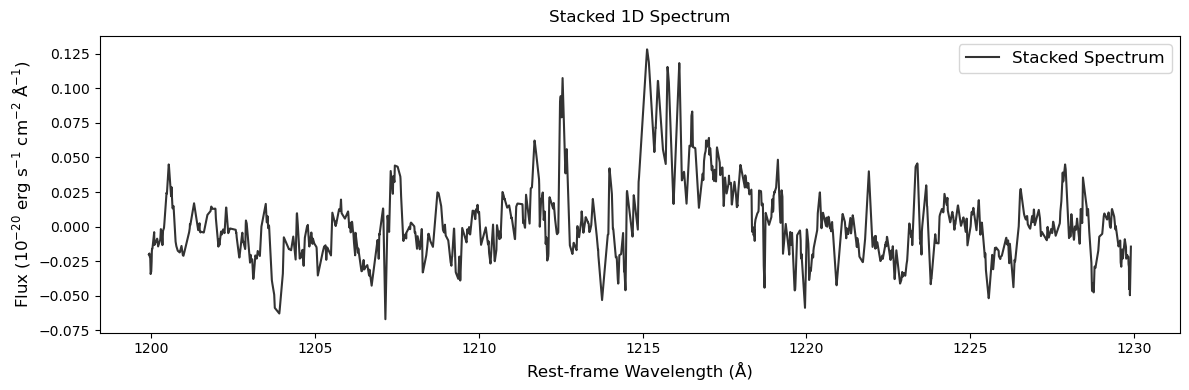

In [16]:
#3


# Plot the stacked 2D image
plt.figure(figsize=(6, 6))
plt.imshow(stacked_2d_image, origin='lower', cmap='viridis')
cbar = plt.colorbar(label=r'Flux (10$^{-20}$ erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$)')
plt.title('Stacked 2D Image')
plt.xlabel('RA (pixels)')
plt.ylabel('Dec (pixels)')
plt.tight_layout()
plt.show()

# Plot the stacked 1D spectrum
plt.figure(figsize=(12, 4))
plt.plot(common_wave, stacked_1d_spectrum, color='black', alpha=0.8, label='Stacked Spectrum')
plt.xlabel(r'Rest-frame Wavelength (Å)', fontsize=12)
plt.ylabel(r'Flux (10$^{-20}$ erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$)', fontsize=12)
plt.title('Stacked 1D Spectrum', fontsize=12, pad=10)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


RA/Dec at center of image (input): 53.167, -27.803
RA/Dec at center of image (wcs): [ 53.16730516 -27.80293635]
Rest wavelength range: (1200, 1230)
Redshift: 5.8183
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8181.96 8386.509
Min value: -54.74139685067348
Max value: 70.29986499622464
Mean value: 2.7256780335536717
RMS: 16.758922279806256


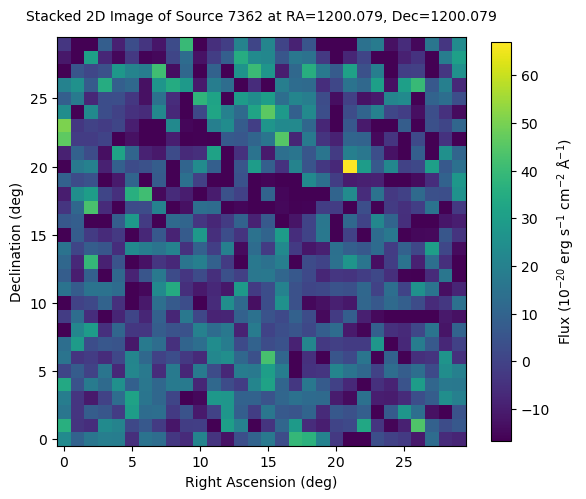

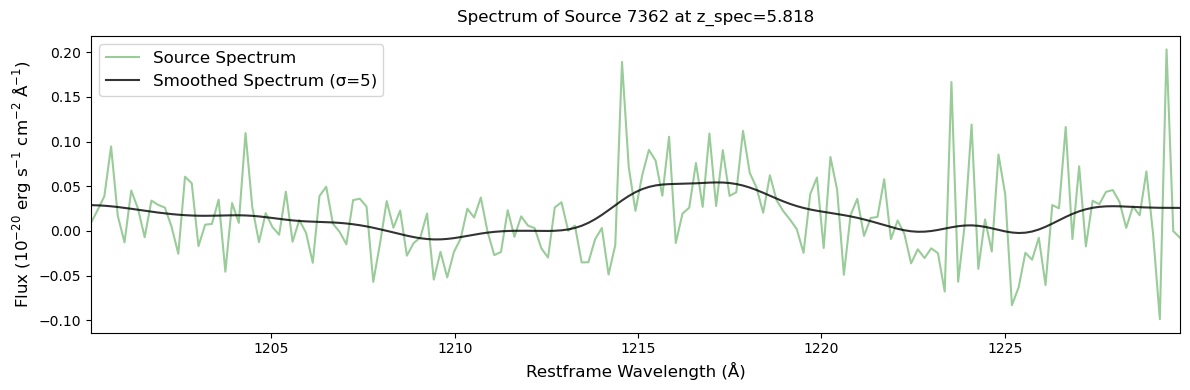

RA/Dec at center of image (input): 53.167, -27.772
RA/Dec at center of image (wcs): [ 53.16660696 -27.77240337]
Rest wavelength range: (1200, 1230)
Redshift: 6.3295
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8795.4 9015.285
Min value: -84.64190878346562
Max value: 64.16842209966853
Mean value: -2.0796316473722496
RMS: 23.23831056263359


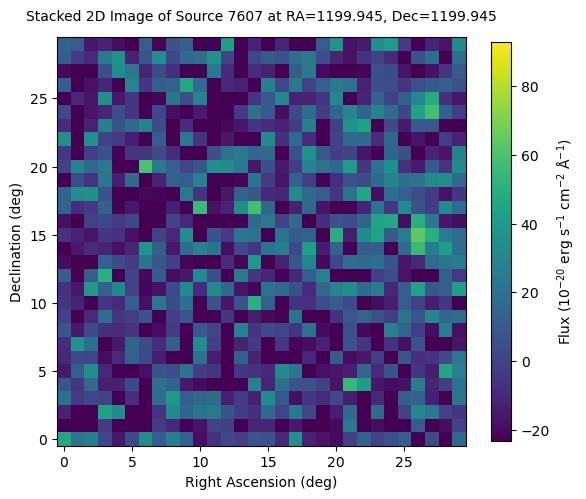

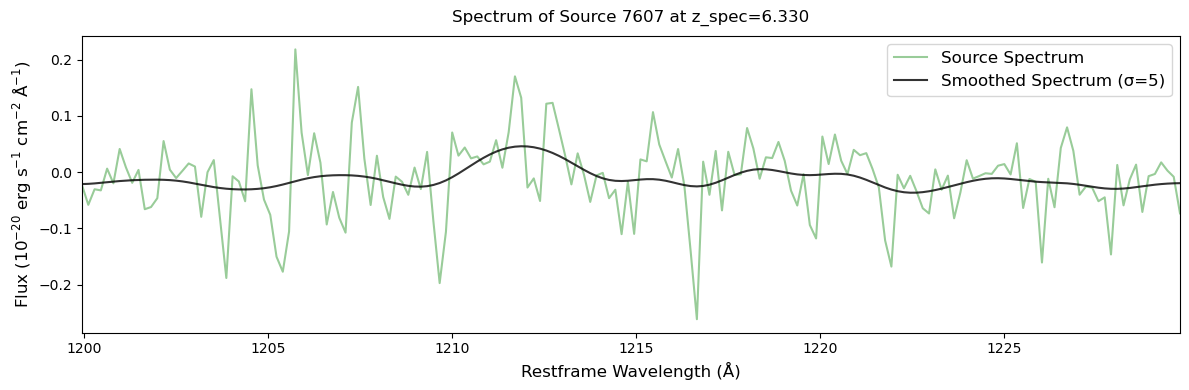

RA/Dec at center of image (input): 53.176, -27.774
RA/Dec at center of image (wcs): [ 53.17584739 -27.7745313 ]
Rest wavelength range: (1200, 1230)
Redshift: 6.3346
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8801.52 9021.558
Min value: -58.81333122681826
Max value: 511.52594551444054
Mean value: 23.07461916101508
RMS: 72.10176896185574


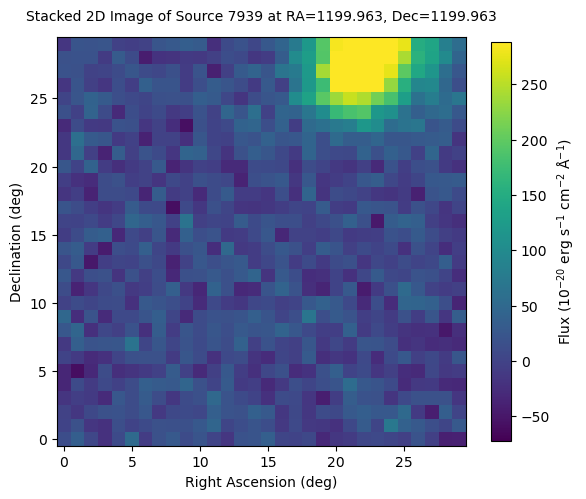

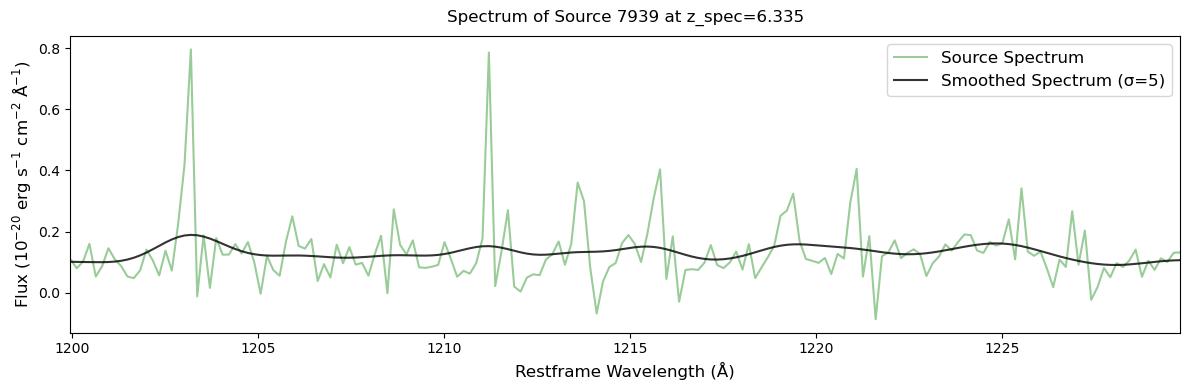

RA/Dec at center of image (input): 53.154, -27.766
RA/Dec at center of image (wcs): [ 53.15409678 -27.76609917]
Rest wavelength range: (1200, 1230)
Redshift: 5.8026
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8163.12 8367.198
Min value: -53.534830338321626
Max value: 384.55336943268776
Mean value: 8.524669413350251
RMS: 37.54190582072131


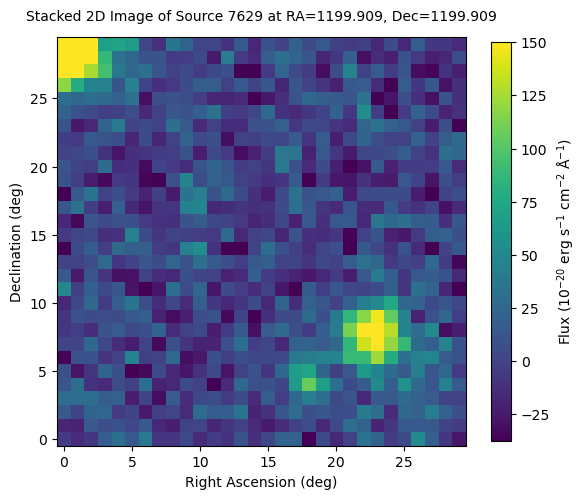

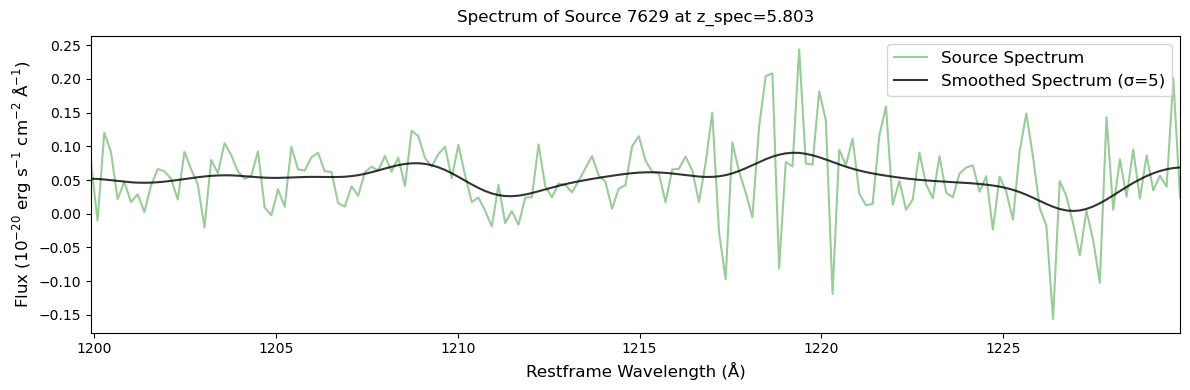

RA/Dec at center of image (input): 53.148, -27.802
RA/Dec at center of image (wcs): [ 53.14842684 -27.80180458]
Rest wavelength range: (1200, 1230)
Redshift: 6.0705
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8484.6 8696.715
Min value: -73.9970665378496
Max value: 88.29858708009124
Mean value: 3.694144804757557
RMS: 22.62048402359672


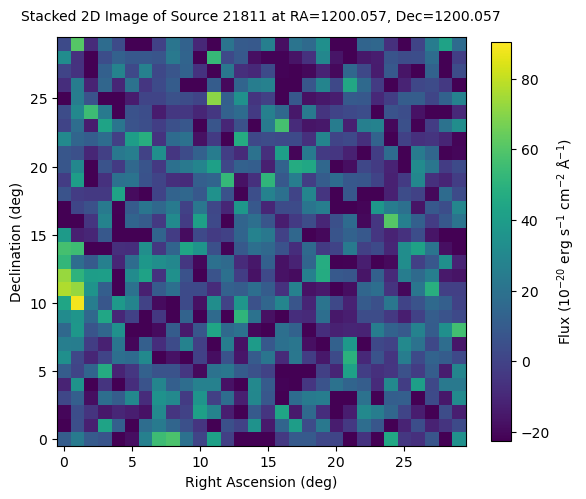

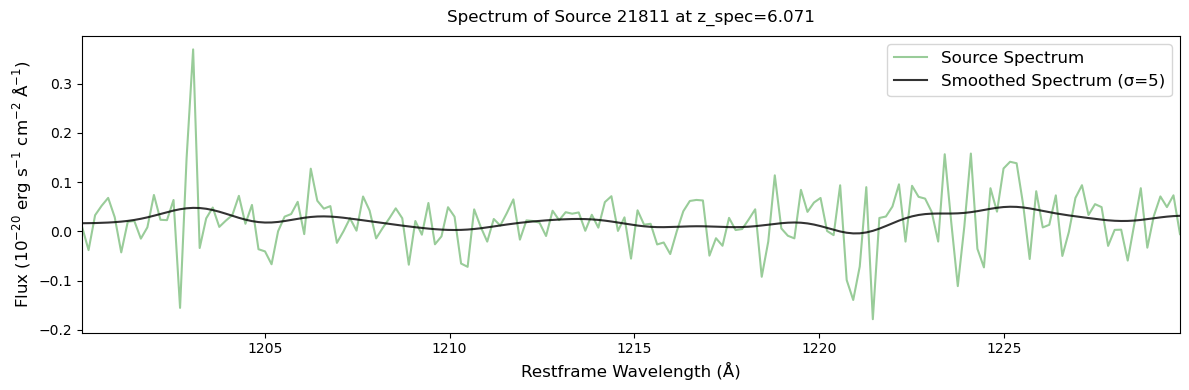

RA/Dec at center of image (input): 53.155, -27.761
RA/Dec at center of image (wcs): [ 53.15515788 -27.76073948]
Rest wavelength range: (1200, 1230)
Redshift: 6.3141
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8776.92 8996.342999999999
Min value: -97.15408462099731
Max value: 92.36803376860917
Mean value: -1.5684852075677675
RMS: 25.21147846646275


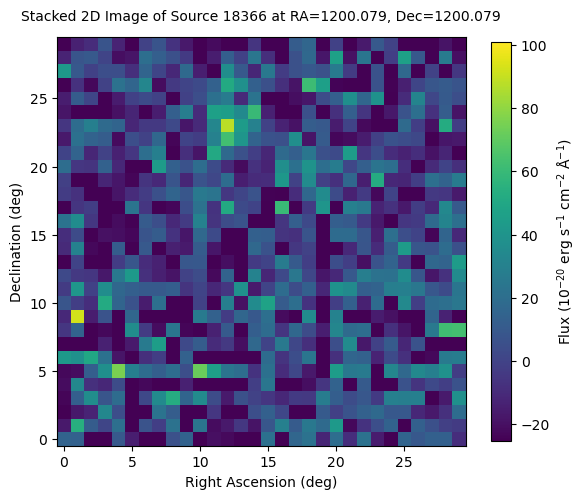

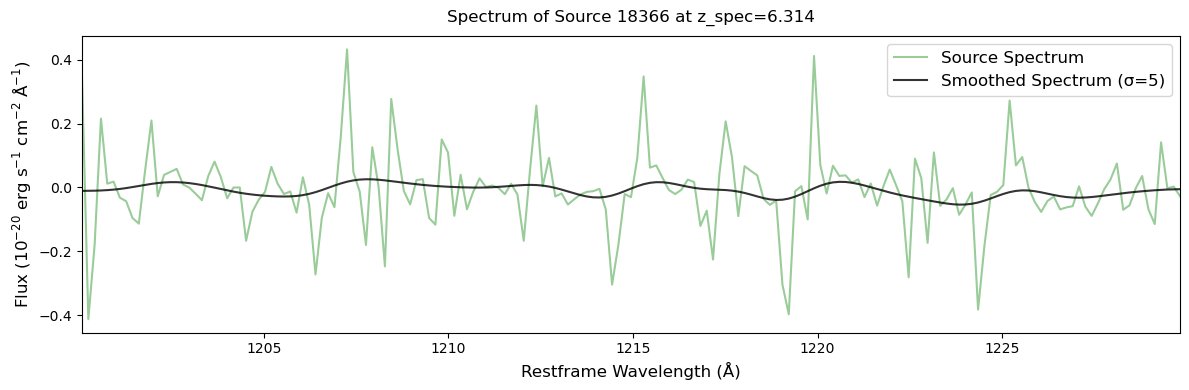

RA/Dec at center of image (input): 53.178, -27.803
RA/Dec at center of image (wcs): [ 53.17751019 -27.80254125]
Rest wavelength range: (1200, 1230)
Redshift: 5.8627
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8235.24 8441.121000000001
Min value: -65.63059710199013
Max value: 67.97611584234983
Mean value: 2.668482602632624
RMS: 20.35045246556231


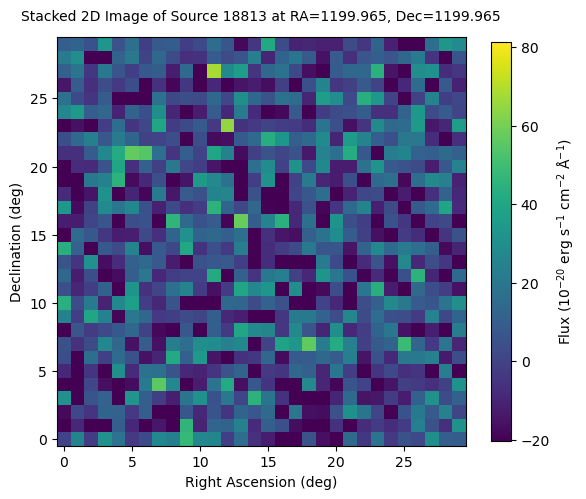

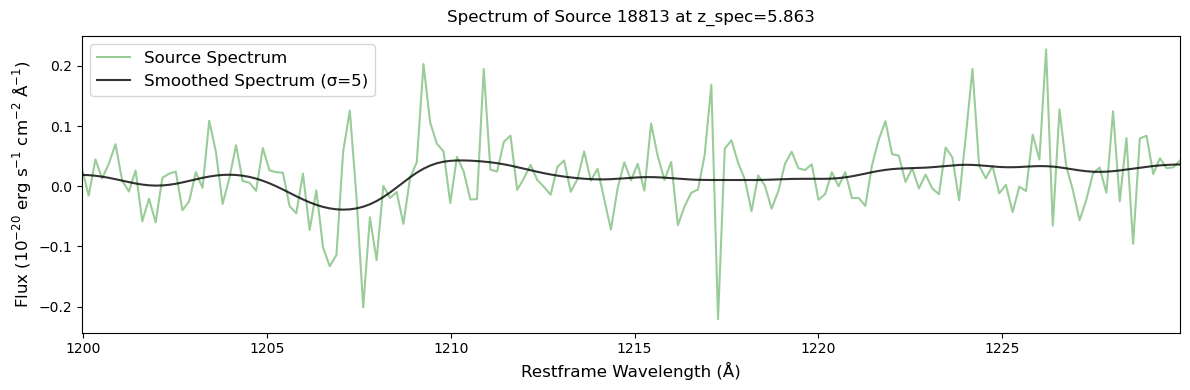

Damped sources done
-----------------------------------
RA/Dec at center of image (input): 53.177, -27.771
RA/Dec at center of image (wcs): [ 53.17658056 -27.77115352]
Rest wavelength range: (1200, 1230)
Redshift: 5.8916
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8269.92 8476.668
Min value: -69.39620412420481
Max value: 105.72145945183001
Mean value: -0.3950173412825259
RMS: 23.158335316359352


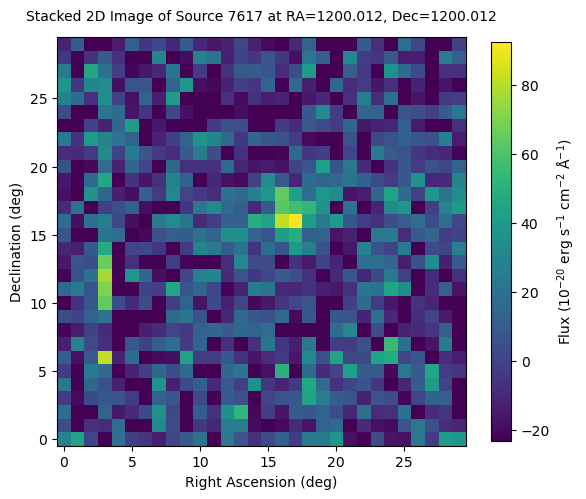

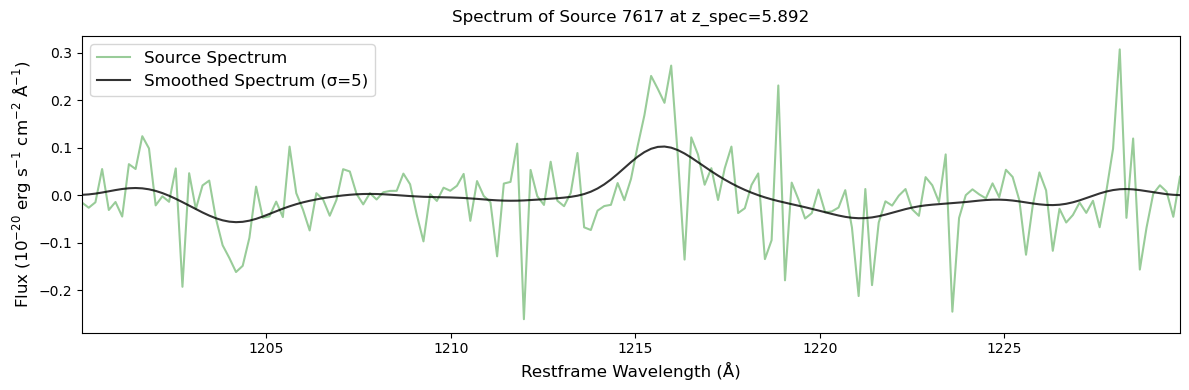

RA/Dec at center of image (input): 53.156, -27.776
RA/Dec at center of image (wcs): [ 53.15614239 -27.77587813]
Rest wavelength range: (1200, 1230)
Redshift: 6.105
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8526.0 8739.15
Min value: -65.11955890059471
Max value: 76.38214908260852
Mean value: -1.2462220163609405
RMS: 20.345273308976818


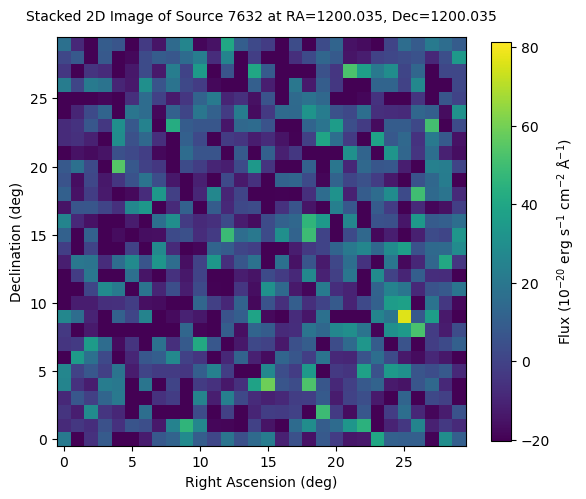

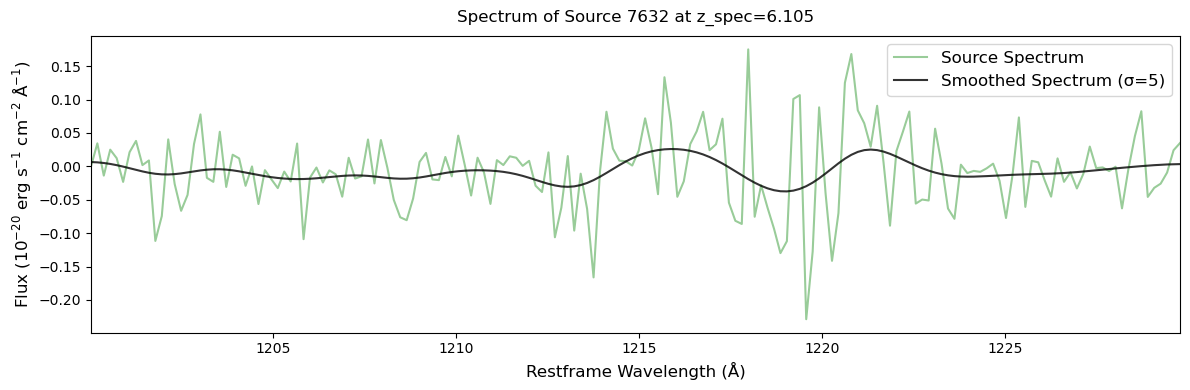

RA/Dec at center of image (input): 53.161, -27.772
RA/Dec at center of image (wcs): [ 53.16064739 -27.77161763]
Rest wavelength range: (1200, 1230)
Redshift: 5.9804
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8376.48 8585.892
Min value: -61.10460890457034
Max value: 136.18382762325928
Mean value: -0.6413622712321941
RMS: 20.00660100008086


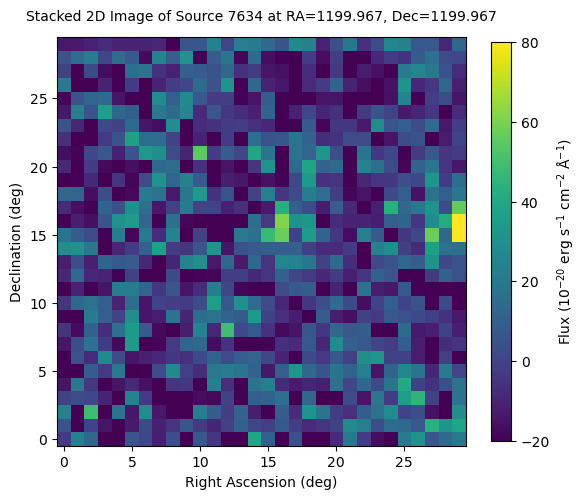

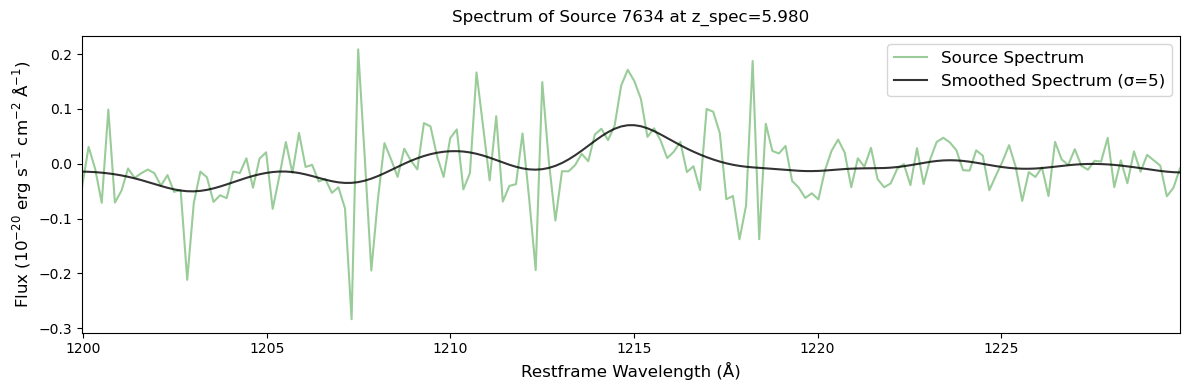

RA/Dec at center of image (input): 53.139, -27.796
RA/Dec at center of image (wcs): [ 53.13931712 -27.79589233]
Rest wavelength range: (1200, 1230)
Redshift: 5.9324
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8318.880000000001 8526.852
Min value: -57.10303825046867
Max value: 60.76460505928844
Mean value: 1.5331427322803453
RMS: 16.0449000155873


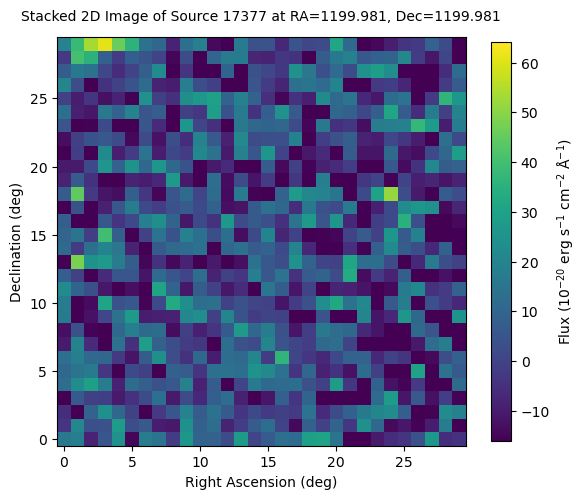

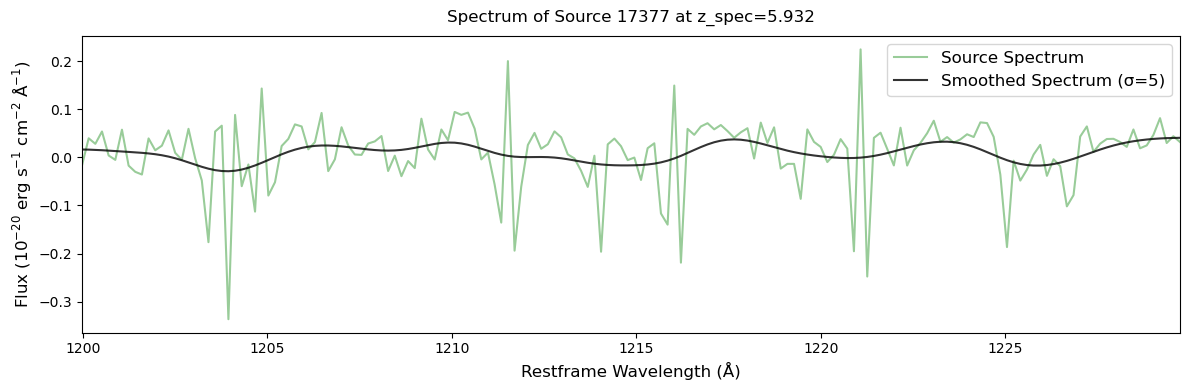

RA/Dec at center of image (input): 53.167, -27.804
RA/Dec at center of image (wcs): [ 53.16684273 -27.80413793]
Rest wavelength range: (1200, 1230)
Redshift: 5.8353
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8202.36 8407.419
Min value: -56.9068792979233
Max value: 124.18510023341514
Mean value: 6.090540137365622
RMS: 21.872639736668926


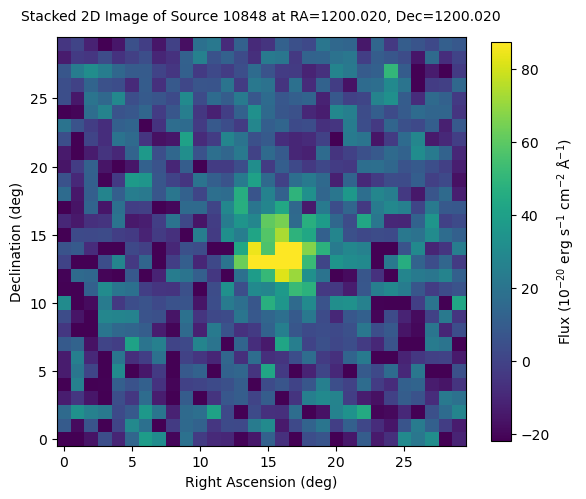

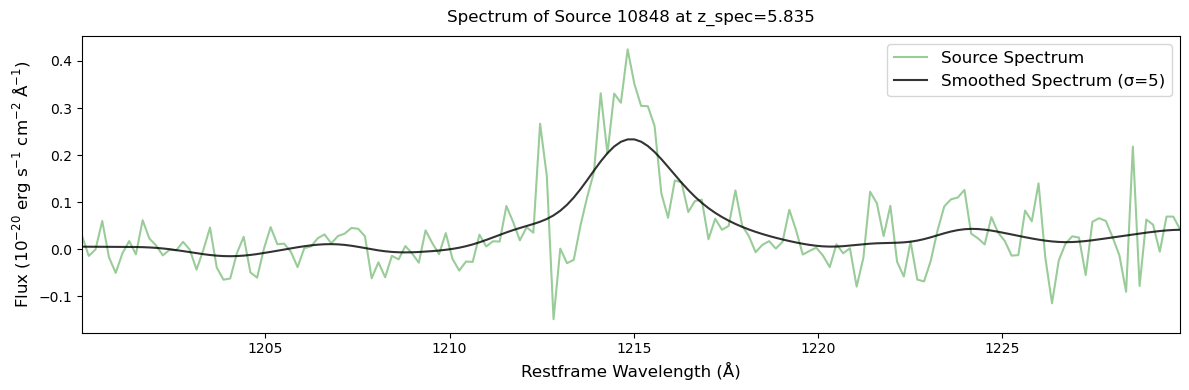

RA/Dec at center of image (input): 53.141, -27.802
RA/Dec at center of image (wcs): [ 53.14075666 -27.80219846]
Rest wavelength range: (1200, 1230)
Redshift: 5.9137
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8296.44 8503.851
Min value: -58.0440598228015
Max value: 76.3049497937318
Mean value: -0.06193269362977137
RMS: 20.78183620749394


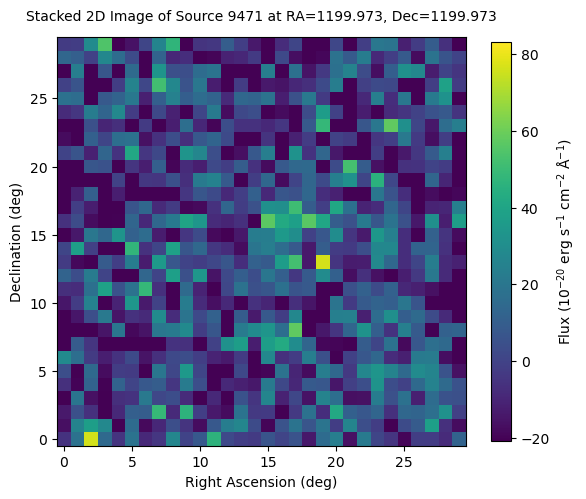

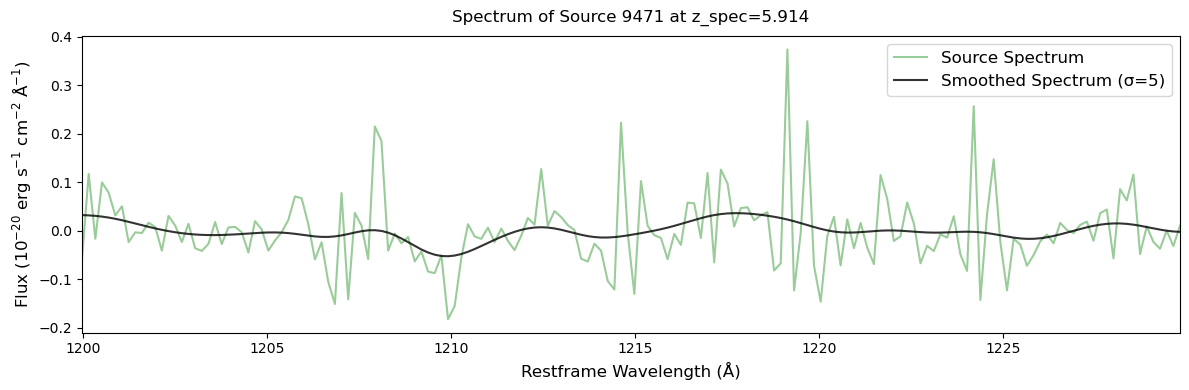

RA/Dec at center of image (input): 53.163, -27.761
RA/Dec at center of image (wcs): [ 53.16281095 -27.76085684]
Rest wavelength range: (1200, 1230)
Redshift: 5.9172
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8300.64 8508.156
Min value: -69.1524278651923
Max value: 102.55086077796295
Mean value: -0.019527081011328846
RMS: 21.74169084399815


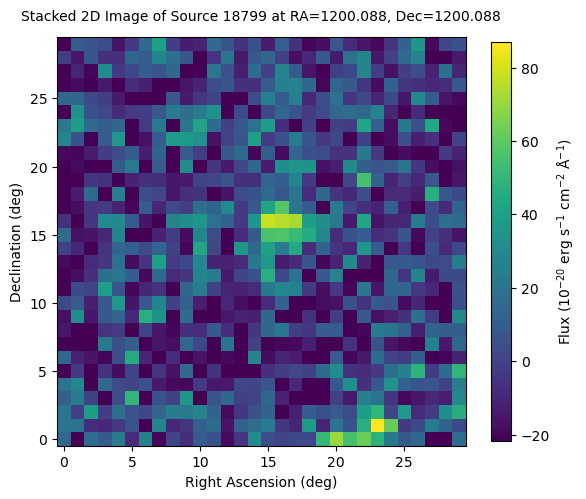

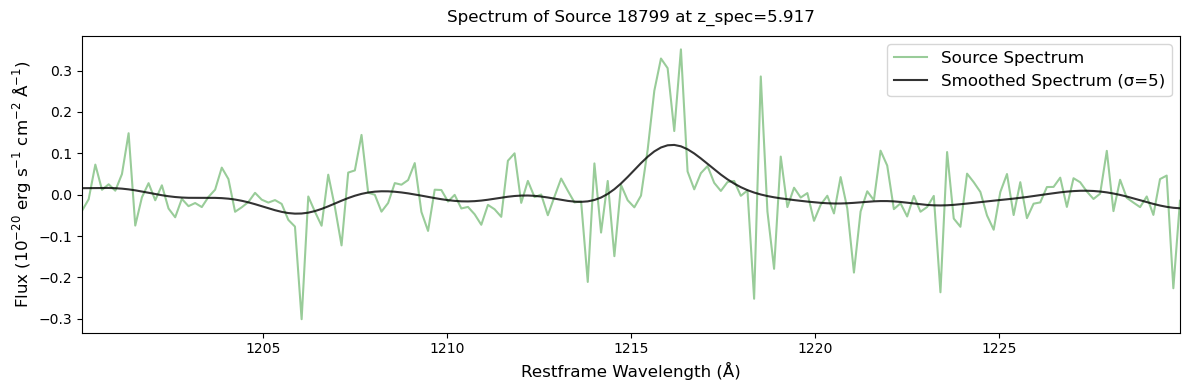

RA/Dec at center of image (input): 53.160, -27.772
RA/Dec at center of image (wcs): [ 53.15953199 -27.77155131]
Rest wavelength range: (1200, 1230)
Redshift: 6.1015
Cube wavelength range: 4750.0 9350.0
Requested wavelength range: 8521.8 8734.845
Min value: -73.18325121421367
Max value: 86.74315382912755
Mean value: 2.0112771403763006
RMS: 22.205811465954522


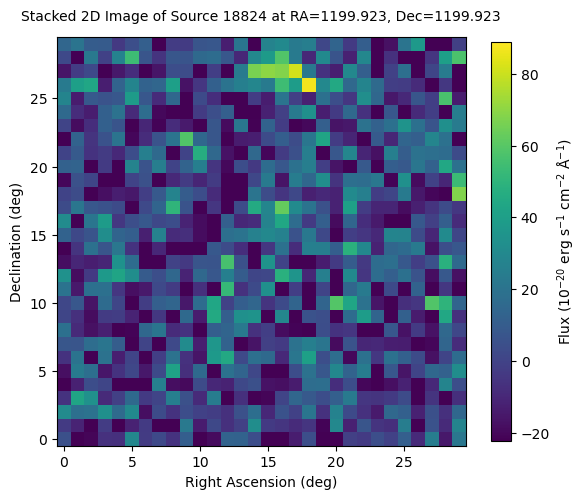

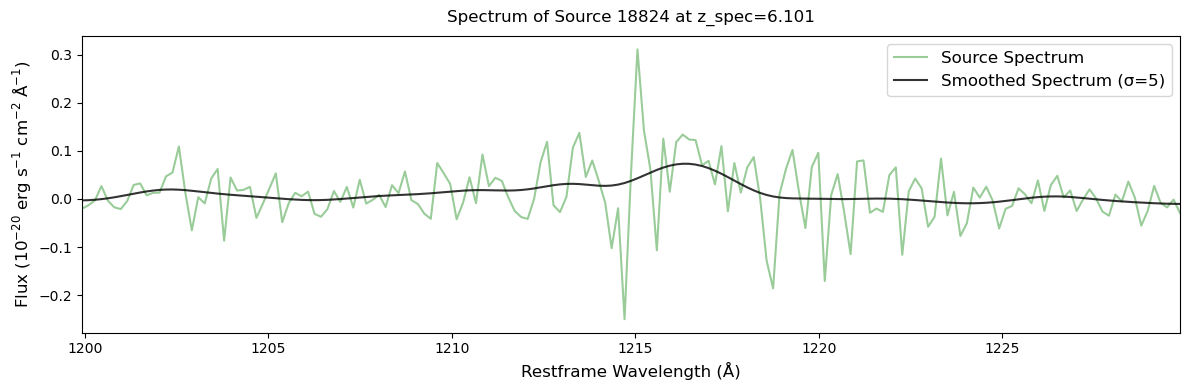

In [17]:
#4

damped_sources = '/Users/s2537809/Downloads/damped_sources.csv'
non_damped_sources = '/Users/s2537809/Downloads/non_damped_sources.csv'

stacked_images_damp, spectrum_data_dict_damp, spectrum_wave_rest_dict_damp = process_sources(damped_sources, filepath, smoothing_sigma=5)

print ('Damped sources done')
print ('-----------------------------------')


stacked_images_nondamp, spectrum_data_dict_nondamp, spectrum_wave_rest_dict_nondamp = process_sources(non_damped_sources, filepath, smoothing_sigma=5)


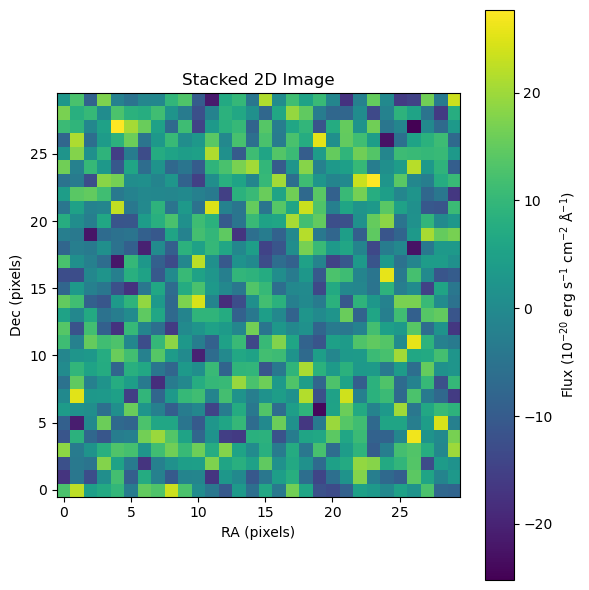

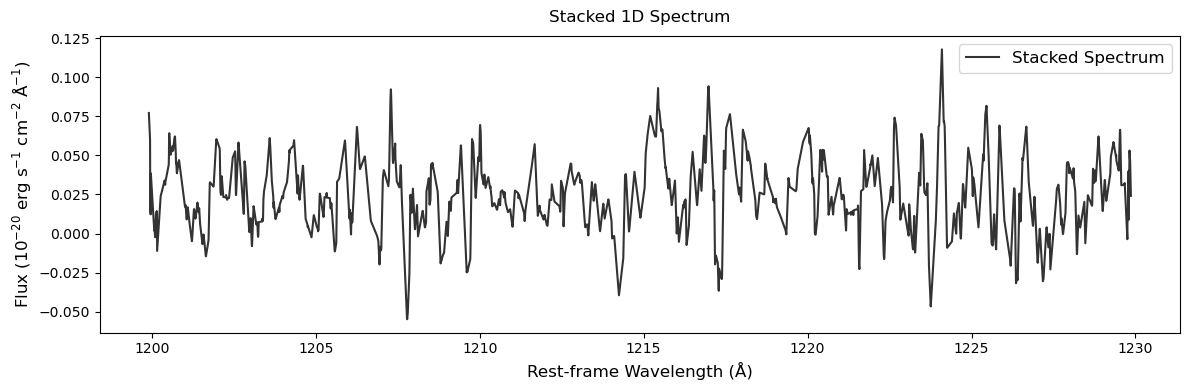

In [18]:
#5
stacked_2d_image = stack_2d_images(stacked_images_damp)
stacked_1d_spectrum, common_wave = stack_1d_spectra(spectrum_data_dict_damp, spectrum_wave_rest_dict_damp)


# Plot the stacked 2D image
plt.figure(figsize=(6, 6))
plt.imshow(stacked_2d_image, origin='lower', cmap='viridis')
cbar = plt.colorbar(label=r'Flux (10$^{-20}$ erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$)')
plt.title('Stacked 2D Image')
plt.xlabel('RA (pixels)')
plt.ylabel('Dec (pixels)')
plt.tight_layout()
plt.show()

# Plot the stacked 1D spectrum
plt.figure(figsize=(12, 4))
plt.plot(common_wave, stacked_1d_spectrum, color='black', alpha=0.8, label='Stacked Spectrum')
plt.xlabel(r'Rest-frame Wavelength (Å)', fontsize=12)
plt.ylabel(r'Flux (10$^{-20}$ erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$)', fontsize=12)
plt.title('Stacked 1D Spectrum', fontsize=12, pad=10)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()



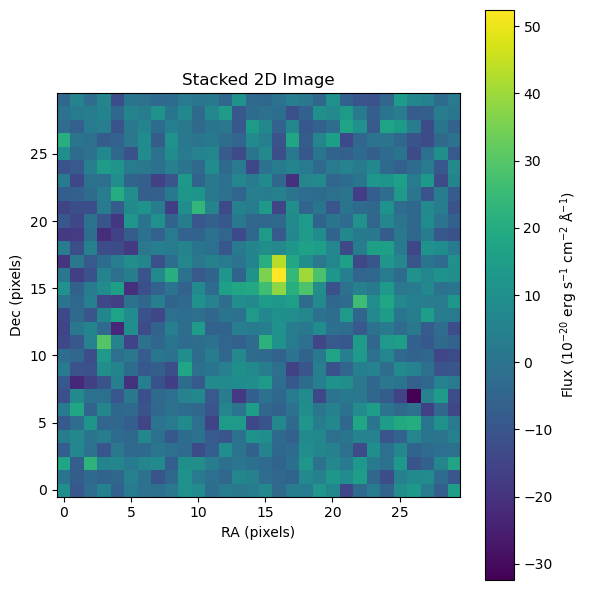

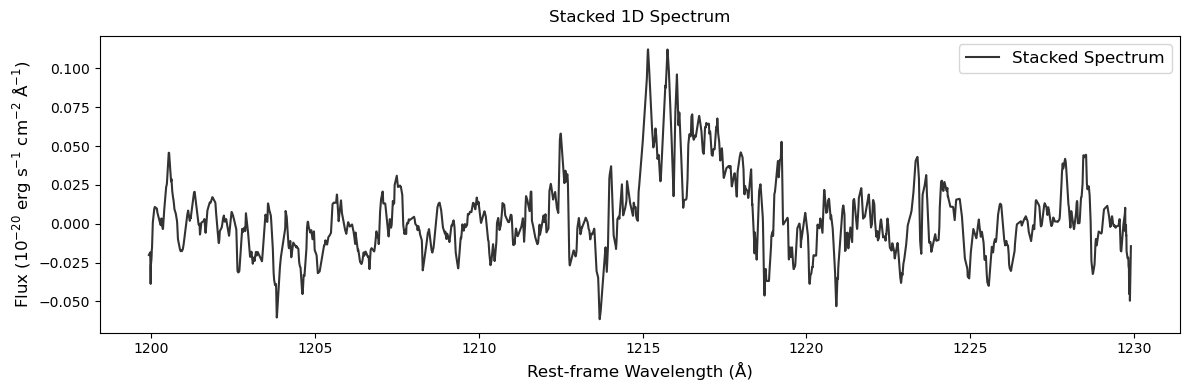

In [19]:
#6
stacked_2d_image = stack_2d_images(stacked_images_nondamp)
stacked_1d_spectrum, common_wave = stack_1d_spectra(spectrum_data_dict_nondamp, spectrum_wave_rest_dict_nondamp)


# Plot the stacked 2D image
plt.figure(figsize=(6, 6))
plt.imshow(stacked_2d_image, origin='lower', cmap='viridis')
cbar = plt.colorbar(label=r'Flux (10$^{-20}$ erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$)')
plt.title('Stacked 2D Image')
plt.xlabel('RA (pixels)')
plt.ylabel('Dec (pixels)')
plt.tight_layout()
plt.show()

# Plot the stacked 1D spectrum
plt.figure(figsize=(12, 4))
plt.plot(common_wave, stacked_1d_spectrum, color='black', alpha=0.8, label='Stacked Spectrum')
plt.xlabel(r'Rest-frame Wavelength (Å)', fontsize=12)
plt.ylabel(r'Flux (10$^{-20}$ erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$)', fontsize=12)
plt.title('Stacked 1D Spectrum', fontsize=12, pad=10)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
